**MCQs and Fill in the blanks Answers:**
1. (A) Boosting
2. (A) Reinforcement Learning
3. Curse of dimensionality
4. high variance, low bias

**Q5A - KMeans : 4 marks**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [8]:
x = np.array([[3.673,3.396], [2.289,3.601], [1.347,2.203], [1.971,2.567],[2.486,1.459], [2.221,2.106], [3.540,1.429], [3.159,2.999], [1.703,1.186], [1.254,3.152]])

In [9]:
model = KMeans(n_clusters = 3,init='k-means++')  #answer: K=3 performs better than K=2. This can be visually noticed in the plot.
pred= model.fit_predict(x) 
print(pred)

[1 1 2 2 0 0 0 1 0 2]


In [10]:
centers = model.cluster_centers_ 
print(centers)

[[2.4875     1.545     ]
 [3.04033333 3.332     ]
 [1.524      2.64066667]]


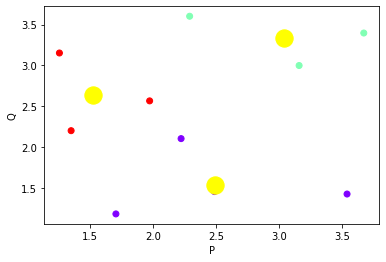

In [11]:
plt.scatter(x[:,0], x[:,1], c=pred, cmap='rainbow')  
plt.xlabel('P')
plt.ylabel('Q')
plt.scatter(centers[:, 0], centers[:, 1], s = 300, c = 'yellow')

In [12]:
test = [[2.523,2.706]]  #answer: for the given data point, for k=3, the class predicted by the model=1. This is verfied from the plot above. 
model.predict(test)

array([1], dtype=int32)

**Q5B - Agglomerative : 2 marks**

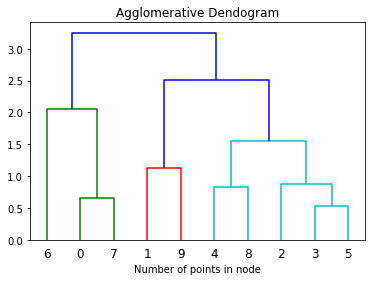

In [13]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
plt.title("Agglomerative Dendogram")
dend = shc.dendrogram(shc.linkage(x, method='ward'), p=4, truncate_mode="level" )  #k=2 is the optimal value of k from the dendrogram.
plt.xlabel("Number of points in node")
plt.show()

In [14]:
model1 = AgglomerativeClustering(n_clusters=2)  #visually the point P = 2.523 and Q =2.706 belongs to class 0
pred= model1.fit_predict(x)
print(pred)

[1 0 0 0 0 0 1 1 0 0]


Text(0, 0.5, 'Q')

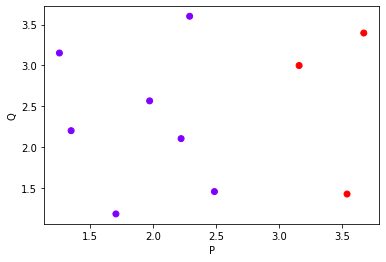

In [15]:
plt.scatter(x[:, 0], x[:, 1], c=pred, cmap='rainbow')  #For this data set, k means clustering gives a better output than agglomerative clustering.
plt.xlabel('P')
plt.ylabel('Q')

**Q6A - Logistic : 4 marks**

In [16]:
import pandas as pd
import numpy as np
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from scipy.special import expit
from sklearn.preprocessing import LabelEncoder

In [18]:
dataset = pd.read_csv('/content/airlines.csv')
lbl = LabelEncoder()  #converting categorical data from satisfaction and gender columns to numerical data
dataset['satisfaction_class'] = lbl.fit_transform(dataset['satisfaction'])
dataset['gender_class'] = lbl.fit_transform(dataset['Gender'])

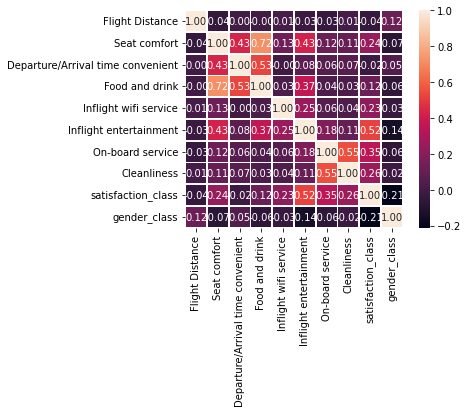

In [19]:
sn.heatmap(dataset.corr(), annot = True, linewidths = 0.8, linecolor = 'w', square = True, fmt = '.2f')

In [20]:
data = dataset[['Inflight entertainment', 'satisfaction_class']] #inflight entertainment is the most suitable input feature
data.columns = ['entertainment','satisfaction']
data

,entertainment,satisfaction
0,4,1
1,2,1
2,0,1
3,4,1
4,3,1
...,...,...
129875,5,1
129876,1,0
129877,2,0
129878,2,0


In [25]:
x = np.array(data['entertainment']).reshape(-1,1) 
y = np.array(data['satisfaction']).reshape(-1,1)  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.36) 

In [26]:
regr = LogisticRegression()
regr.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [27]:
print(regr.score(x_train, y_train)) 

0.8021606534894072


In [29]:
y_pred = regr.predict(x_test)  #the test accuracy is more than train accuracy but only by a minimal amount which shows that minimal overfitting has happened. K fold cross validation is one technique we can use to avoid this in the future.
print(regr.score(x_test, y_test)) 
print(np.round_(regr.coef_, decimals = 2)) 
print(np.round_(regr.intercept_, decimals = 2))  #ln(p/1-p) = -3.19 + 1(x) is my logistic regression equation

0.8021686592381889
[[1.]]
[-3.19]


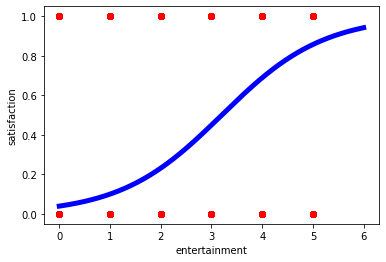

In [31]:
X_test = np.linspace(0, 6, 10000)  #from the graph, for entertainment =3.9, satisfaction lies towards 1 which means "satisfied"
Y = expit(X_test * regr.coef_ + regr.intercept_).flatten()  
plt.scatter(x_test, y_test, color ='red')
plt.plot(X_test, Y, color ='blue', linewidth= 5)
plt.xlabel('entertainment')
plt.ylabel('satisfaction')
plt.show()

**Q6B - KNN Classification : 3 marks**

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
data = dataset[['Inflight entertainment', 'On-board service','satisfaction_class']] #from the correlation plot, entertainment and inflight service are highly correlated with satisfaction
data.columns = ['entertainment','service','satisfaction']
data

,entertainment,service,satisfaction
0,4,3,1
1,2,4,1
2,0,3,1
3,4,1,1
4,3,2,1
...,...,...,...
129875,5,3,1
129876,1,2,0
129877,2,4,0
129878,2,3,0


In [33]:
x = np.array(data[['entertainment', 'service']]).reshape(-1,2) 
y = np.array(data['satisfaction']).reshape(-1,1)  
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.36)

In [34]:
cls = KNeighborsClassifier(n_neighbors=8)  
cls.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=8)

In [35]:
cls.score(x_train, y_train)

0.8094269937321801

In [37]:
cls.score(x_test, y_test) #the test accuracy is slightly less than train accuracy which means our model is correct. 

0.8058900271617084

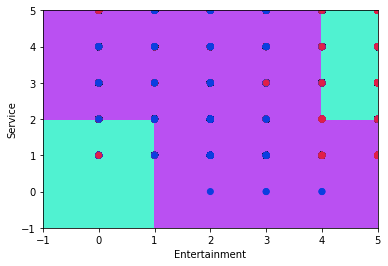

In [39]:
cmap_light = ListedColormap(['#BA50F2', '#50F2D1'])  #for the values - entertainment = 3.9, service = 2, from the plot, the class is : "satisfied"
cmap_bold = ListedColormap(['#0C3EE0', '#E11E47'])   

x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1 
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max),
np.arange(y_min, y_max))

Z = cls.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel("Entertainment")
plt.ylabel("Service")
plt.show()